# Useful Packages

By Jacky Poon.

*This article was originally published on [Actuaries Digital](https://www.actuaries.digital/2019/09/26/my-top-10-r-packages-for-data-analytics/) (the magazine of the Actuaries Institute Australia), on 26/09/2019 as "My Top 10 R Packages for Data Analytics".* 
*It was been updated for changes in packages since that time and republished on the [IFoA Machine Learning for Reserving blog](https://institute-and-faculty-of-actuaries.github.io/mlr-blog/), on 29/09/2020.*
*Further updates have been added on 26/09/2021 for this version.*

*Those new to R or machine learning may wish to treat this article as a preview for how to do different tasks in R since it is pitched at a more advanced level.*

A few months ago Zeming Yu wrote ["My top 10 Python packages for data science"](https://www.actuaries.digital/2019/04/11/my-top-10-python-packages-for-data-science/) where he shared his top Python packages for Data Science. Like him, my preferred way of doing data analysis has shifted away from proprietary tools to these amazing freely available packages - except extending beyond data science and into traditional actuarial applications as well.

I'd like to take the opportunity now to share some of my old-time favourites and exciting new packages for R. Whether you are an experienced R user or new to the game, I think there may be something here for you to take away.

Use install.packages (e.g. ``install.packages("arrow")``) to install packages from [CRAN](https://cran.r-project.org/).

# General 

## 1. Tidyverse

No discussion of top R packages would be complete without the [tidyverse](https://www.tidyverse.org/). In a way, this is cheating because there are multiple packages included in this - data analysis with [dplyr](https://dplyr.tidyverse.org/), visualisation with [ggplot2](https://ggplot2.tidyverse.org/), some basic modelling functionality, and comes with a fairly comprehensive [book](https://r4ds.had.co.nz/) that provides an excellent introduction to usage.

If you were getting started with R, it's hard to go wrong with the tidyverse toolkit. And if you are just getting started, check out our recent Insights - Starting the Data Analytics Journey - Data Collection [video](https://youtu.be/tyj4ov7EuFI) [audio](https://www.actuaries.asn.au/Library/Events/Insights/2018/INS180717IntroToDataAnalyticsAudio.mp3) [presentation](https://www.actuaries.asn.au/Library/Events/Insights/2018/180717StartingTheDataAnalyticsJourneyPresentation.pdf). That and more can be found on our [knowledge bank page.](https://actuaries.asn.au/knowledge-bank/past-events/2019)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



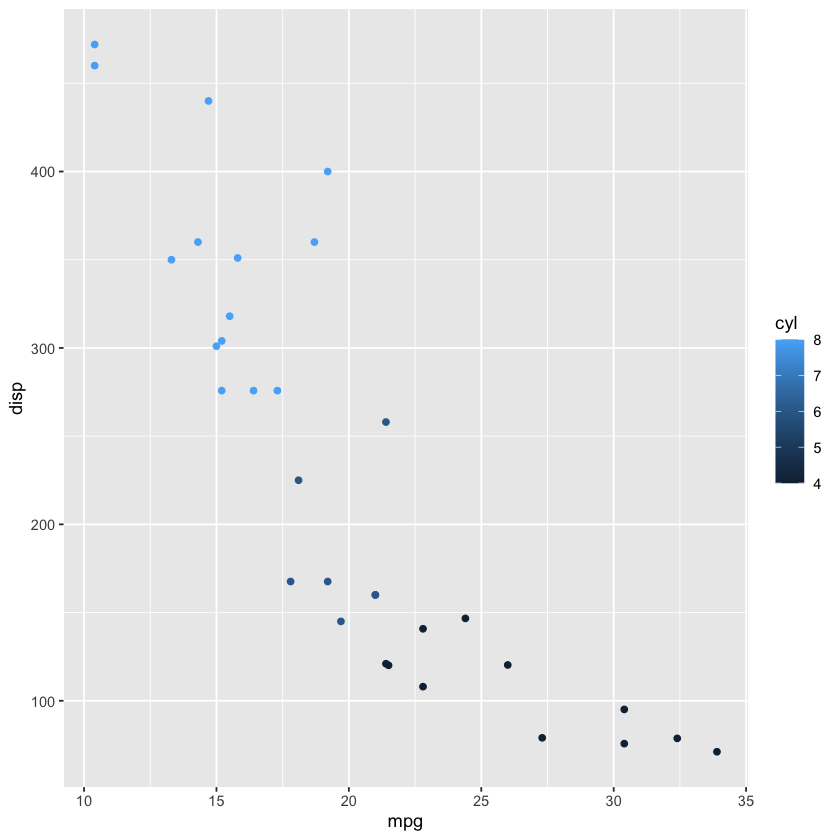

In [1]:
library(tidyverse)
ggplot(mtcars, aes(mpg, disp, color=cyl)) + geom_point()

# Data 

## 2. Need for speed? dtplyr

There has been a perception that R is slow, but with packages like [data.table](https://github.com/Rdatatable/data.table/wiki), R has the [fastest data extraction and transformation package in the West.](https://h2oai.github.io/db-benchmark/) However, the dplyr syntax may more familiar for those who use SQL heavily, and personally I find it more intuitive. So, [dtplyr](https://github.com/tidyverse/dtplyr) provides the best of both worlds.

In [2]:
# Install from github as at time of writing.
# install.packages("devtools")
# devtools::install_github("tidyverse/dtplyr")
library(dtplyr) 
library(data.table)
mtcars %>% 
  lazy_dt() %>%
  group_by(cyl) %>%
  summarise(total.count = n()) %>%
  as.data.table()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




cyl,total.count
<dbl>,<int>
4,11
6,7
8,14


## 3. Out of Memory? disk.frame

One major limitation of r data frames and Python's pandas is that they are in memory datasets - consequently, medium sized datasets that SAS can easily handle will max out your work laptop's measly 4GB RAM. The ideal solution would be to do those transformations on the data warehouse server, which would reduce data transfer and also should, in theory, have more capacity. If it runs with SQL, dplyr probably has a backend through [dbplyr](https://cran.r-project.org/web/packages/dbplyr/vignettes/sql.html). Alternatively, with cloud computing, it is possible to rent computers with up to 3,904 GB of RAM.

But for those with a habit of exploding the data warehouse or those with cloud solutions being blocked by IT policy, [disk.frame](https://github.com/xiaodaigh/disk.frame) is an exciting new alternative. It does require some additional planning with respect to data chunks, but maintains a familiar syntax - check out the examples on the page. 

The package stores data on disk, and so is only limited by disk space rather than memory...

## 4. Parking it with parquet and Arrow

Running low on disk space once, I asked my senior actuarial analyst to do some benchmarking of different data storage formats: the "Parquet" format beat out sqlite, hdf5 and plain CSV - the latter by a wide margin. That experience is also likely not unique as well, considering this [article](https://tech.marksblogg.com/billion-nyc-taxi-rides-sqlite-parquet-hdfs.html) where the author squashes a 500GB dataset to a mere fifth of its original size.

If you were working with a heavy workload with a need for distributed cluster computing, then [sparklyr](https://blog.rstudio.com/2019/03/15/sparklyr-1-0/) could be a good full stack solution, with integrations for Spark-SQL, and machine learning models [xgboost](https://github.com/rstudio/sparkxgb), [tensorflow](https://github.com/rstudio/sparktf) and [h2o](https://spark.rstudio.com/guides/h2o/). 

But often you just want to write a file to disk, and all you need for that is [Apache Arrow](https://github.com/apache/arrow/tree/master/r).

In [3]:
library(arrow)
write_parquet(mtcars, "test.parquet") # Done!


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




# Modelling

## 6. Trees: xgboost

You may have seen earlier videos from Zeming Yu on [Lightgbm](https://www.youtube.com/watch?v=pzwE1WBOAnU), myself on [XGBoost](https://www.youtube.com/watch?v=1cqTMqtun0c) and of course Minh Phan on [CatBoost](https://www.youtube.com/watch?v=G-HQ9HLV8HY). Perhaps you've heard me extolling the virtues of [h2o.ai](h2o.ai) for beginners and prototyping as well.

LightGBM has become my favourite now in Python. It is incredibly fast, and although it has the limitation that it can only do leaf-wise models - unlike XGBoost which has the flexibility to use traditional depth-wise growth models as well - but a lower memory usage allows you to be greedier in putting large datasets into the model.

Installation in R was originally quite difficult when the article was first written, but in 2021, it can now be installed from CRAN simply using ``install.packages("lightgbm")``.

With either XGBoost or LightGBM it is fairly straightforward to build a model - here we use ``model.matrix`` to convert categorical variables, then model with xgboost. 


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




[1]	train-rmse:34.509953 
[2]	train-rmse:28.322361 
[3]	train-rmse:24.726925 
[4]	train-rmse:22.752447 
[5]	train-rmse:21.716965 
[6]	train-rmse:21.189470 
[7]	train-rmse:20.914919 
[8]	train-rmse:20.779711 
[9]	train-rmse:20.712818 
[10]	train-rmse:20.679955 


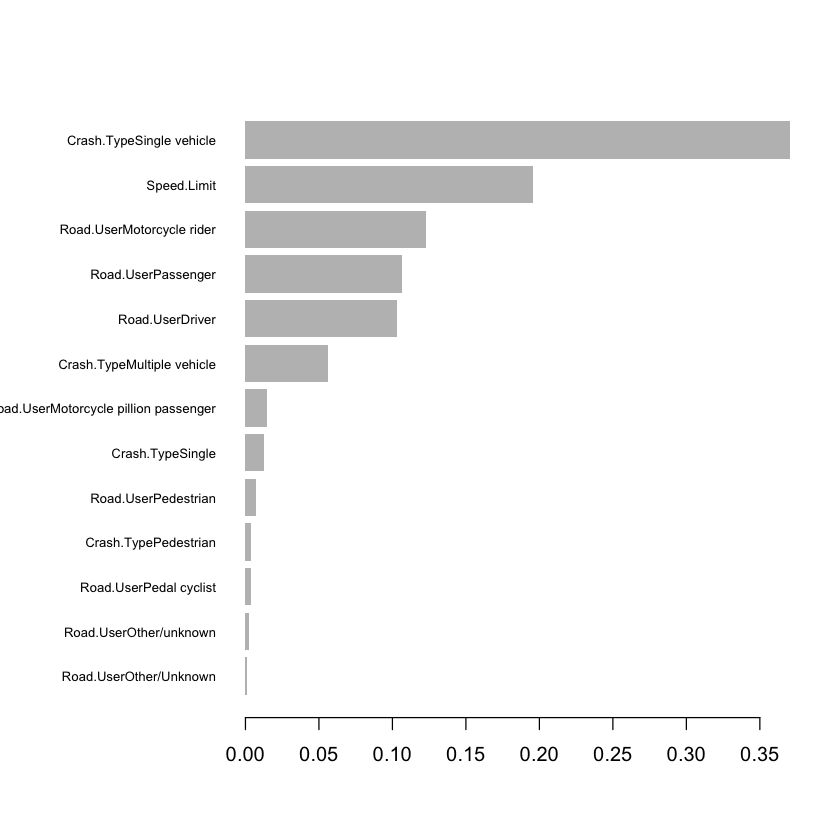

In [4]:
library(xgboost)
library(Matrix)
# Road fatalities data - as previously seen in the YAP-YDAWG course
deaths <- read.csv("https://raw.githubusercontent.com/ActuariesInstitute/YAP-YDAWG-R-Workshop/master/bitre_ardd_fatalities_dec_2018.csv")
# Explain age of the fatality based on speed limit, road user and crash type
model_matrix = model.matrix(Age ~ Speed.Limit + Road.User + Crash.Type, data=deaths)[,-1]
bst <- xgboost(data = model_matrix, label = deaths$Age, nrounds=10, objective="reg:squarederror")
xgb.importance(feature_names = colnames(model_matrix), 
               model = bst) %>%
  xgb.plot.importance()

Generally, ``sparse.model.matrix`` is more memory efficient than ``model.matrix`` with XGBoost, especially with large categorical levels. However, the code for the model explanation with the DALEX package (featured later) is made more complex. See [this comment](https://github.com/ModelOriented/DALEX/issues/331#issuecomment-694773105) by the package author for an example of how to use ``sparse.model.matrix`` with ``xgboost`` and ``DALEX``.

## 7. Nets: keras

Neural network models are generally better done in Python rather than R, since Facebook's Pytorch and Google's Tensorflow are built with it in mind. However in writing [Analytics Snippet: Multitasking Risk Pricing Using Deep Learning](https://www.actuaries.digital/2018/08/23/analytics-snippet-multitasking-risk-pricing-using-deep-learning/) I found Rstudio's [keras](https://keras.rstudio.com/) interface to be pretty easy to pick up. 

While most example usage and online tutorials will be in Python, they translate reasonably well to their R counterparts. The Rstudio team were also incredibly responsive when I filed a [bug report](https://github.com/rstudio/keras/issues/471) and had it fixed within a day.

For another example of keras usage, the Swiss ["Actuarial Data Science" Tutorial](https://actuarialdatascience.org/ADS-Tutorials/) includes another example with [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3320525) and [code](https://github.com/JSchelldorfer/ActuarialDataScience/tree/master/3%20-%20Nesting%20Classical%20Actuarial%20Models%20into%20Neural%20Networks). 

## 8. Multimodel: MLR

Working with multiple models - say a linear model and a GBM - and being able to calibrate hyperparameters, compare results, benchmark and blending models can be tricky. This video on [Applied Predictive Modeling](https://youtu.be/dB-JHhEJvQA) by the author of the [caret](https://cran.r-project.org/web/packages/caret/index.html) package explains a little more on what's involved.

If you want to get up and running quickly, and are okay to work with just GLM, GBM and dense neural networks and prefer an all-in-one solution, h2o.ai works well. It does all those models, has good feature importance plots, and ensembles it for you with autoML too, as explained in [this video by Jun Chen](https://youtu.be/IO-3CYnk-Mo) from the 2018 Weapons of Mass Deduction video competition. Ensembling h2o models got me second place in the 2015 Actuaries Institute Kaggle competition, so I can attest to its usefulness.

[mlr](https://mlr.mlr-org.com/) comes in for something more in-depth, with detailed feature importance, partial dependence plots, cross validation and ensembling techniques. It integrates with over 100 models by default and it is not too hard to write your own. 

There is a handy [cheat sheet](https://github.com/mlr-org/mlr/blob/master/addon/cheatsheet/MlrCheatsheet.pdf). 

***Update for 2020: the successor package [mlr3](https://github.com/mlr-org/mlr3) has matured significantly. It is now available on CRAN and the [documentation](https://mlr3book.mlr-org.com/) has developed to become quite comprehensive. It has its own cheat sheets which can be found [here](https://cheatsheets.mlr-org.com/). Like the original mlr package, it has many useful features for better model fitting. New users would generally benefit from using mlr3 for new projects today.***

# Visualisation and Presentation

## 8. Too technical for Tableau (or too poor)? flexdashboard

To action insights from modelling analysis generally involves some kind of report or presentation. Rarely you may want to serve R model predictions directly - in which case [OpenCPU](https://www.opencpu.org/) may get your attention - but generally it is a distillation of the analysis that is needed to justify business change recommendations to stakeholders.

[Flexdashboard](https://rmarkdown.rstudio.com/flexdashboard/) offers a template for creating dashboards from Rstudio with the click of a button. This extends R Markdown to use Markdown headings and code to signpost the panels of your dashboard.

Interactivity similar to Excel slicers or VBA-enabled dropdowns can be added to R Markdown documents using Shiny. To do so, add ‘runtime: shiny’ to the header section of the R Markdown document. This is great for live or daily dashboards. It is also possible to produce static dashboards using only Flexdashboard and distribute over email for reporting with a monthly cadence.

Previously with the YAP-YDAWG R Workshop [video](https://youtu.be/_SvfEdp8_1c) [presentation](https://actuaries.logicaldoc.cloud/download-ticket?ticketId=db8440d1-06b5-476a-b0f5-d07aa87f38e3), we included an example of flexdashboard usage as a take-home exercise. Take a look at the [code repository](https://github.com/ActuariesInstitute/YAP-YDAWG-R-Workshop) under "09_advanced_viz_ii.Rmd"!

## 9. HTML Charts: plotly

Different language, same package. [Plot.ly](https://plot.ly/r/getting-started/) is a great package for web charts in both Python and R. The documentation steers towards the paid server-hosted options but using for charting functionality offline is free even for commercial purposes. The interface is clean, and charts embeds well in RMarkdown documents.

Check out an older example using plotly with [Analytics Snippet: In the Library](https://www.actuaries.digital/2018/06/14/analytics-snippet-in-the-library/)

One notable downside is the hefty file size which may not be great for email. If that is an issue I would consider the [R interface for Altair](https://github.com/vegawidget/altair) - it is a bit of a loop to go from R to Python to Javascript but the [vega-lite](https://vega.github.io/vega-lite/) javascript library it is based on is fantastic - user friendly interface, and what I use for my personal blog so that it loads fast on mobile. [Leaflet](https://rstudio.github.io/leaflet/) is also great for maps.

## 10. Explain it Like I'm Five: DALEX

Also featured in the [YAP-YDAWG-R-Workshop](https://github.com/ActuariesInstitute/YAP-YDAWG-R-Workshop), the DALEX package helps explain model prediction. Like mlr above, there is feature importance, actual vs model predictions, partial dependence plots:

Welcome to DALEX (version: 2.3.0).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies


Attaching package: ‘DALEX’


The following object is masked from ‘package:dplyr’:

    explain




Preparation of a new explainer is initiated
  -> model label       :  xgb.Booster  (  default  )
  -> data              :  49734  rows  14  cols 
  -> target variable   :  49734  values 
  -> predict function  :  yhat.default will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package Model of class: xgb.Booster package unrecognized , ver. Unknown , task regression (  default  ) 
  -> predicted values  :  numerical, min =  17.38693 , mean =  38.26188 , max =  64.52395  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -57.70045 , mean =  1.101735 , max =  72.88297  
  A new explainer has been created!  


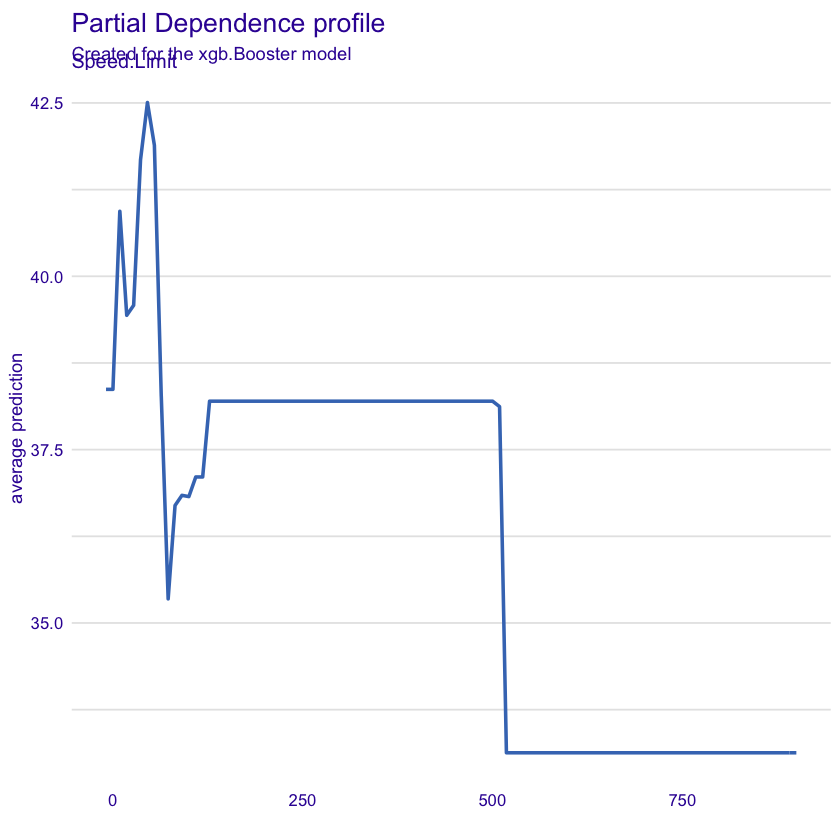

In [5]:
library(DALEX)
xgb_expl <- explain(model = bst, data = model_matrix, y = deaths$Age)
# Variable splits type is either dependent on data by default, or 
# with uniform splits, shows an even split for plotting purposes
resp <- model_profile(xgb_expl, variables="Speed.Limit", variable_splits_type = "uniform")
plot(resp)

Yep, the data looks like it needs a bit of cleaning - check out the course materials! ... but the key use of DALEX in addition to mlr is individual prediction explanations:

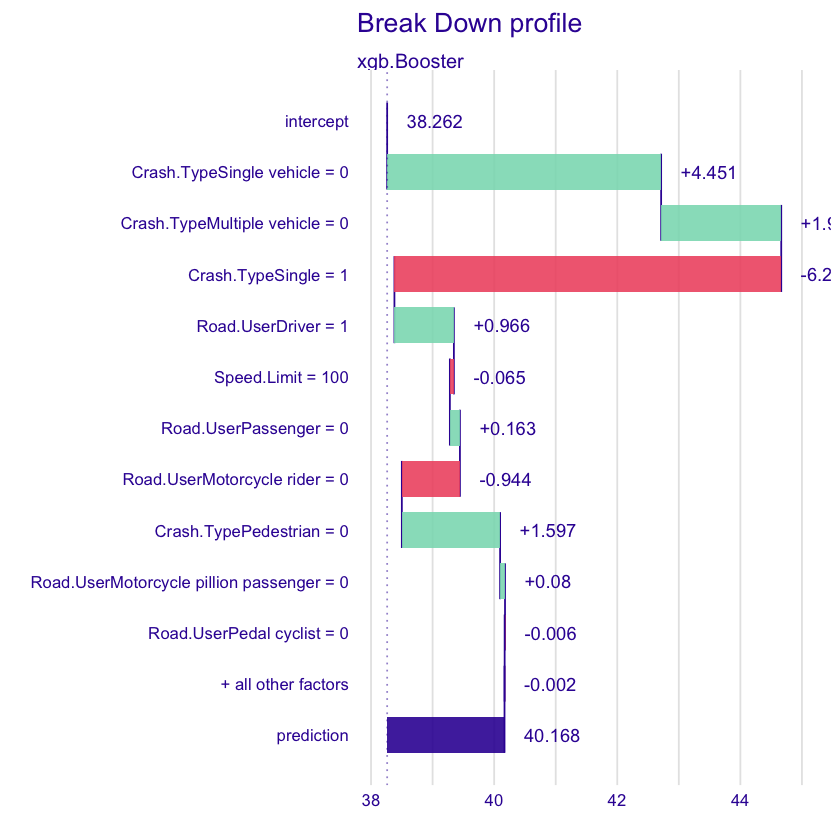

In [6]:
brk <- predict_parts(xgb_expl, new_observation=model_matrix[1, ,drop=FALSE])
plot(brk)

# Concluding thoughts

We have taken a journey with ten amazing packages covering the full data analysis cycle, from data preparation, with a few solutions for managing "medium" data, then to models - with crowd favourites for gradient boosting and neural network prediction, and finally to actioning business change - through dashboard and explanatory visualisations - and most of the runners up too... 

I would recommend exploring the resources in the many links as well, there is a lot of content that I have found to be quite informative. Did I miss any of your favourites? Let me know in the comments!